# Reservoir Computer

At a very high level, think of a reservoir in reservoir computing like a pond into which you throw pebbles. Each pebble represents an input signal or piece of data. When a pebble hits the water, it creates ripples that interact with one another in complex ways. The way these ripples move and interact across the pond's surface can tell you a lot about the shape of the pond, any obstacles in the water, and even the size and speed of the pebbles thrown.

In this analogy:

- **The pond** is the reservoir, a network of interconnected neurons (or nodes) that process incoming signals.
- **The pebbles** are the inputs to the system, such as pieces of data from a time series.
- **The ripples** represent the activity within the reservoir. Just as ripples can vary in size, speed, and direction, the activity within the reservoir changes based on the inputs it receives.

When you throw a single pebble into the pond, you get a simple set of ripples. Throw two pebbles close together, and the ripples might merge and interact in more complex ways. The idea is similar in reservoir computing: inputs to the system interact within the reservoir, leading to complex patterns of activity that encode information about those inputs and their relationships over time.

The key features of this system are:

- **Memory**: Just as the ripples from earlier pebbles affect the surface of the pond when new pebbles are thrown in, the reservoir retains a memory of past inputs. This memory influences how it responds to new inputs, allowing the system to process sequences of data that depend on previous events.
- **Nonlinearity**: The way ripples interact is not straightforward (linear). They can merge, split, reflect off the pond's edges, and so on. Similarly, the reservoir's neurons process inputs in a nonlinear fashion, enabling the system to capture complex patterns and relationships within the data.
- **High-dimensional representation**: Even a small action, like throwing a pebble, can create a wide variety of ripples across the entire pond. Likewise, even simple inputs can lead to complex, high-dimensional patterns of activity within the reservoir, providing a rich representation of the input data.

Overall, the reservoir acts as a dynamic memory system that transforms inputs into a high-dimensional space, capturing temporal patterns and relationships in the data. This transformation makes it easier to perform tasks like predicting future events in a sequence or recognizing patterns in time-series data. The beauty of reservoir computing lies in its simplicity and efficiency, as the complex internal dynamics of the reservoir emerge from relatively simple rules and structures.

# Echo State Network

Here's a simple implementation plan for an ESN:

This code provides a basic structure for creating and using an Echo State Network. Note that `output_data` needs to be defined as part of your training dataset along with `input_data`. The `initialize_reservoir`, `train_reservoir`, and `predict` functions collectively implement the reservoir computer model. You can adjust the size of the reservoir, spectral radius, input weights, and regularization coefficient as needed to optimize performance for specific tasks.


1. **Initialize the reservoir**: Create a large, sparse matrix that represents the connections within the reservoir. The reservoir's dynamics are determined by this matrix, its spectral radius, and the nonlinearity applied to its units.

2. **Define the input weights**: Randomly generate the weights that project the input signal into the reservoir space.

3. **Implement the reservoir update rule**: At each time step, update the reservoir's state based on the current input and the previous state of the reservoir.

4. **Train the output weights**: Use a simple linear regression or ridge regression to find the output weights that map the reservoir states to the desired output.

5. **Predict new outputs**: Use the trained model to predict outputs for new inputs.

Here's a Python implementation of a basic ESN:

In [1]:
import numpy as np
from scipy.sparse import random as sparse_random
from sklearn.linear_model import Ridge

def initialize_reservoir(size, spectral_radius):
    '''
    Initializes the reservoir with given size and spectral radius.
    
    Parameters:
    size (int): Number of neurons in the reservoir.
    spectral_radius (float): Spectral radius of the reservoir's weight matrix.
    
    Returns:
    np.ndarray: Initialized reservoir weight matrix.
    '''
    # Create a random sparse matrix
    reservoir = sparse_random(size, size, density=0.1).A
    # Scale it to have the desired spectral radius
    radius = np.max(np.abs(np.linalg.eigvals(reservoir)))
    reservoir *= spectral_radius / radius
    return reservoir


def train_reservoir(input_data, output_data, reservoir_matrix, input_weights, reg_coeff=1e-8):
    '''
    Trains the reservoir to map input data to output data using ridge regression.
    
    Parameters:
    input_data (np.ndarray): Input data matrix (time steps x input size).
    output_data (np.ndarray): Output data matrix (time steps x output size).
    reservoir_matrix (np.ndarray): Reservoir weight matrix.
    input_weights (np.ndarray): Weights for input data.
    reg_coeff (float): Regularization coefficient for ridge regression.
    
    Returns:
    np.ndarray: Trained output weights.
    '''
    states = []
    current_state = np.zeros(reservoir_matrix.shape[0])
    for input_vec in input_data:
        # Ensure input_vec is correctly shaped for the dot product
        if input_vec.ndim > 1:
            input_vec = input_vec.squeeze()  # Squeeze if necessary
        current_state = np.tanh(np.dot(reservoir_matrix, current_state) + np.dot(input_weights, input_vec))
        states.append(current_state)
    states = np.array(states)
    
    # Train output weights with ridge regression
    ridge_regressor = Ridge(alpha=reg_coeff)
    ridge_regressor.fit(states, output_data)
    return ridge_regressor.coef_




def predict(input_data, reservoir_matrix, input_weights, output_weights):
    '''
    Predicts the output for given input data using the trained model.
    
    Parameters:
    input_data (np.ndarray): Input data to predict output for.
    reservoir_matrix (np.ndarray): Reservoir weight matrix.
    input_weights (np.ndarray): Weights for input data.
    output_weights (np.ndarray): Trained output weights.
    
    Returns:
    np.ndarray: Predicted output data.
    '''
    states = []
    current_state = np.zeros(reservoir_matrix.shape[0])
    for input in input_data:
        current_state = np.tanh(np.dot(reservoir_matrix, current_state) + np.dot(input_weights, input))
        states.append(current_state)
    states = np.array(states)
    
    predictions = np.dot(states, output_weights.T)
    return predictions

To demonstrate running a reservoir computer, specifically an Echo State Network (ESN), on sample data, let's consider a simple task: predicting the next value in a sine wave. This example will help illustrate how to use the reservoir computer for time-series prediction.

First, we'll generate some sample sine wave data, then define and initialize our reservoir, and finally, train and test the reservoir on this data. The steps include generating the data, preprocessing it (if necessary), initializing the reservoir, training the output weights, and making predictions.

Here's a step-by-step Python implementation:

### Step 1: Generate Sample Sine Wave Data

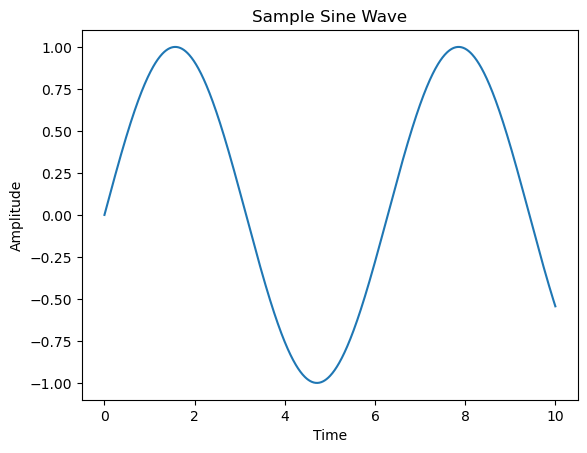

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 with 1000 steps
data = np.sin(t)

# Visualize the sine wave
plt.plot(t, data)
plt.title('Sample Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

### Step 2: Preprocess Data

For simplicity, we'll directly use this data as our input without further preprocessing. However, in real scenarios, normalization and reshaping might be required.

### Step 3: Define Reservoir Computer

We'll use the previously defined functions for initializing the reservoir, training, and prediction. Let's adapt them to our current context:

### Step 4: Initialize the Reservoir and Input Weights

In [3]:
size = 100  # Size of the reservoir
spectral_radius = 1.2  # Spectral radius of the reservoir
input_size = 1  # Because we are using sine wave values one at a time
output_size = 1  # Predicting the next sine wave value

reservoir_matrix = initialize_reservoir(size, spectral_radius)
input_weights = np.random.rand(size, input_size) * 2 - 1  # Random weights between -1 and 1

### Step 5: Prepare Data for Training and Testing

We need to split our sine wave data into input-output pairs for training the reservoir:

In [4]:
# Shift data by one for predicting the next step
input_data = data[:-1].reshape(-1, 1)  # All data except the last point as input
output_data = data[1:].reshape(-1, 1)  # All data except the first point as output

# Split data into training and testing sets
split_index = int(len(input_data) * 0.8)
train_input = input_data[:split_index]
train_output = output_data[:split_index]
test_input = input_data[split_index:]
test_output = output_data[split_index:]

### Step 6: Train the Reservoir

In [5]:
output_weights = train_reservoir(train_input, train_output, reservoir_matrix, input_weights)

### Step 7: Make Predictions and Visualize

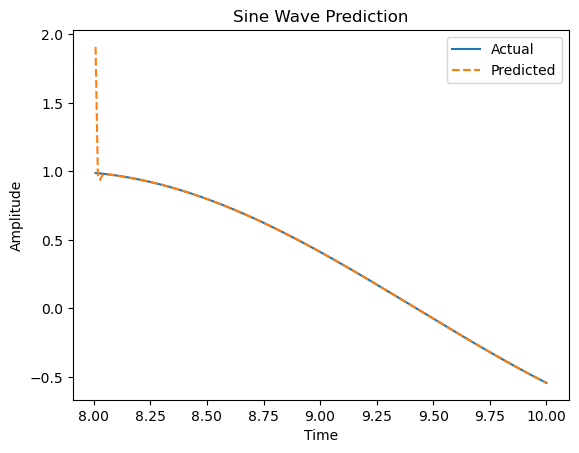

In [6]:
predictions = predict(test_input, reservoir_matrix, input_weights, output_weights)

# Visualize predictions
plt.plot(t[split_index + 1:], test_output, label='Actual')
plt.plot(t[split_index + 1:], predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('Sine Wave Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

This example provides a basic illustration of how to run a reservoir computer on sample data. Depending on your specific task or dataset, you might need to adjust the reservoir size, spectral radius, input/output dimensions, and preprocessing steps.

# The reservoir

The reservoir in a reservoir computing system, such as an Echo State Network (ESN), functions as a kind of "dynamical black box." However, its operation is based on well-understood principles from dynamical systems theory and neural network modeling. Here's a breakdown of what happens inside the reservoir and why it's effective for processing time-series data:

### High-Dimensional Dynamics
- **State Space Expansion**: The reservoir transforms input signals into a higher-dimensional space. This expansion enables the network to capture and represent complex patterns and temporal dependencies in the input data that might not be discernible in the original low-dimensional space.

- **Temporal Memory**: Due to the recurrent connections within the reservoir, it inherently possesses memory of past inputs. This memory is not explicit but is encoded in the dynamic states of the reservoir neurons. The duration and fidelity of this memory depend on the reservoir's design, particularly its spectral radius and the sparsity of the connections.

### Nonlinearity
- **Nonlinear Processing**: The reservoir comprises nonlinear units (e.g., neurons with a tanh activation function). This nonlinearity allows the reservoir to perform complex transformations on the input data, enabling it to handle nonlinear dynamics in time-series data effectively.

### Fixed Random Connections
- **Random Connectivity**: The connections within the reservoir are typically initialized randomly and remain fixed during operation. This random structure contributes to the reservoir's ability to generalize across different tasks without the need for task-specific tuning.

- **Echo State Property**: A key property of the reservoir is that it should possess the "echo state property," meaning the network's state is uniquely determined by past inputs, disregarding initial conditions. This ensures that the reservoir's response to an input sequence is consistent and predictable, which is crucial for learning tasks.

### Projection and Readout
- **High-Dimensional Projection**: By projecting inputs into a high-dimensional space, the reservoir facilitates the separation of input patterns that might be difficult to distinguish in their original form. This separation improves the learnability of the patterns by the readout layer.

- **Readout Layer**: The readout or output layer linearly combines the high-dimensional representations of the input data present in the reservoir to perform the desired task. Only the weights connecting the reservoir to the output layer are trained, making the learning process much simpler and more efficient than in traditional recurrent neural networks.

### Effectiveness for Temporal Data
The dynamics within the reservoir provide a rich, temporal context for the inputs, capturing both the immediate and historical information. This capability makes reservoir computing particularly effective for time-series prediction, sequence generation, and temporal pattern recognition tasks, where understanding the temporal evolution of data is crucial.

In summary, while the reservoir might seem like a "black box" due to its fixed, random connections and internal dynamics, its operation is grounded in the principles of nonlinear dynamics and dimensionality expansion. The reservoir's design enables it to process time-series data in a way that captures both the complexity and the temporal dependencies of the data, providing a powerful tool for various signal processing and machine learning tasks.

# Simple example to understand the black box of the reservoir

Understanding the inner workings of a reservoir in reservoir computing (e.g., Echo State Networks, ESN) can be facilitated by a simplified example. Let's consider a very basic scenario with a small reservoir to illustrate the concept and provide some intuition about how and why it works.

### Simplified Reservoir Example

Imagine we have a reservoir computing system designed to process one-dimensional time-series data. Our reservoir will be extremely simplified:

- **Reservoir Size**: 3 neurons (nodes).
- **Input Size**: 1 dimension.
- **Activation Function**: Hyperbolic tangent (tanh), a common nonlinear activation function.
- **Task**: Predicting the next value in a sequence based on the current value.

### Initialization

1. **Reservoir Weights**: A 3x3 matrix with fixed, small random values to simulate the internal connections. For simplicity, let's assume all weights are positive and below 1.
   
2. **Input Weights**: A 1x3 matrix (since we have 1 input and 3 neurons) with fixed random values.

### Input Signal

Consider a simple input signal, a time series of values. For this example, let's use three time steps: [0.5, -0.2, 0.1].

### Processing Steps

1. **Initial State**: The initial state of the reservoir neurons is zero.

2. **Time Step 1 (Input = 0.5)**:
   - The input is fed into the reservoir through the input weights, affecting each of the three neurons differently.
   - The reservoir's state is updated based on the combination of the input signal's influence and the interconnected neurons' influence on each other.
   - The new state is a tanh activation applied to the sum of the input influence and the internal connections' influence.

3. **Time Step 2 (Input = -0.2)**, **Time Step 3 (Input = 0.1)**:
   - Repeat the process for each new input, updating the reservoir's state based on the current input and the previous state of the reservoir.

### Observation

By observing the state of the reservoir over these three time steps, we'll notice a few key points:

- **Memory**: The state of the reservoir at any time step is influenced by the current input and the previous state, indicating that the reservoir retains memory of past inputs.
- **Nonlinearity**: The tanh activation introduces nonlinearity, allowing the reservoir to capture complex patterns in the input signal.
- **High-Dimensional Representation**: Even with a simple input, the reservoir's state provides a high-dimensional representation of the input history, enriching the data representation for the output layer.

### Visualization

A visualization of the reservoir's state over time could help illustrate how the state changes in response to the input sequence. This dynamic evolution reflects the reservoir's memory and its ability to process temporal information.

### Understanding the "Black Box"

This simplified example shows how the reservoir processes input signals by updating its internal state based on both current inputs and its own dynamics. The key takeaways are:

- The reservoir's memory and nonlinearity enable it to capture and process temporal dependencies in the input data.
- The high-dimensional space of the reservoir states allows complex input patterns to be separated and represented in ways that are useful for prediction or classification tasks.

To get a deeper understanding, one could experiment with this simplified setup by changing the input sequence, reservoir weights, or activation function and observing how these changes affect the reservoir's state evolution. This hands-on approach can provide valuable insights into the workings of reservoir computing systems.

# Example with numerical values

Let's delve into a detailed example with actual matrices and math to illustrate the workings of a simplified reservoir computing system, specifically focusing on a small Echo State Network (ESN). We'll process a short time-series input through a reservoir with 3 neurons to understand the dynamics within the "black box."

### Reservoir Initialization

1. **Reservoir Weights** ($W_{res}$): A 3x3 matrix representing the connections between neurons within the reservoir. These are fixed, randomly initialized weights.
   
2. **Input Weights** ($W_{in}$): A 1x3 matrix representing the connections from the input to the reservoir neurons.

For simplicity, let's assign some values:

- $W_{res} = \begin{bmatrix} 0.3 & 0.1 & 0 \\ 0 & 0.4 & 0.2 \\ 0.1 & 0 & 0.5 \end{bmatrix}$
- $W_{in} = \begin{bmatrix} 0.5 \\ 0.2 \\ 0.4 \end{bmatrix}$

### Input Signal

Consider a time-series input: [0.5, -0.2, 0.1], representing the signal at three consecutive time steps.

### Processing Steps

#### Initial State of the Reservoir

Let's assume the initial state of the reservoir neurons is zero:

- $x(0) = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$

#### Time Step 1 (Input = 0.5)

1. **Compute the input influence**: $W_{in} \cdot Input = \begin{bmatrix} 0.5 \\ 0.2 \\ 0.4 \end{bmatrix} \cdot 0.5 = \begin{bmatrix} 0.25 \\ 0.1 \\ 0.2 \end{bmatrix}$
   
2. **Update the reservoir state** using the formula $x(t) = \tanh(W_{res} \cdot x(t-1) + W_{in} \cdot Input)$. For the first time step, it simplifies to $x(1) = \tanh(\begin{bmatrix} 0.25 \\ 0.1 \\ 0.2 \end{bmatrix})$ because the previous state $x(0)$ contributes nothing (all zeros).

   Applying $\tanh$:
   
   $x(1) = \begin{bmatrix} \tanh(0.25) \\ \tanh(0.1) \\ \tanh(0.2) \end{bmatrix} \approx \begin{bmatrix} 0.2449 \\ 0.0997 \\ 0.1974 \end{bmatrix}$

#### Time Step 2 (Input = -0.2)

1. **Compute the input influence**: $W_{in} \cdot Input = \begin{bmatrix} 0.5 \\ 0.2 \\ 0.4 \end{bmatrix} \cdot (-0.2) = \begin{bmatrix} -0.1 \\ -0.04 \\ -0.08 \end{bmatrix}$
   
2. **Update the reservoir state**:

   $x(2) = \tanh(W_{res} \cdot x(1) + W_{in} \cdot Input)$

   Calculating $W_{res} \cdot x(1)$:
   
   $W_{res} \cdot x(1) = \begin{bmatrix} 0.3 & 0.1 & 0 \\ 0 & 0.4 & 0.2 \\ 0.1 & 0 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0.2449 \\ 0.0997 \\ 0.1974 \end{bmatrix} = \begin{bmatrix} 0.0824 \\ 0.1195 \\ 0.1237 \end{bmatrix}$

   Adding $W_{in} \cdot Input$:
   
   $\begin{bmatrix} 0.0824 \\ 0.1195 \\ 0.1237 \end{bmatrix} + \begin{bmatrix} -0.1 \\ -0.04 \\ -0.08 \end{bmatrix} = \begin{bmatrix} -0.0176 \\ 0.0795 \\ 0.0437 \end{bmatrix}$

   Applying $\tanh$:
   
   $x(2) = \tanh(\begin{bmatrix} -0.0176 \\ 0.0795 \\ 0.0437 \end{bmatrix}) \approx \begin{bmatrix} -0.0176 \\ 0.0793 \\ 0.0436 \end{bmatrix}$

#### Time Step 3 (Input = 0.1)

Following a similar process for the next input, we update the reservoir's state again.

### Observation and Interpretation

- **Memory and State Evolution**: Each state update depends on the previous state and the current input, demonstrating how the reservoir maintains memory of past inputs.
- **Nonlinearity and Dynamics**: The use of $\tanh$ as an activation function introduces nonlinearity into the reservoir's response, allowing it to capture complex dynamics.
- **High-Dimensional Representation**: Even in this simple example, the reservoir transforms the 1-dimensional input into a 3-dimensional state space, enriching the representation of the input signal over time.

This walkthrough provides a glimpse into the reservoir's internal mechanics, showing how it processes inputs and evolves its state over time. By examining such simplified examples, we can gain insights into the principles underlying more complex reservoir computing systems.

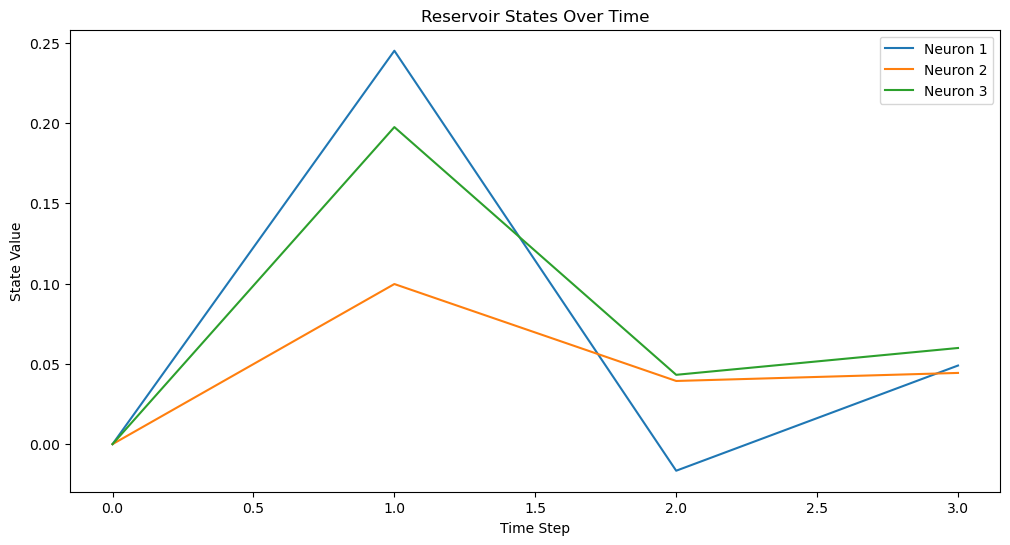

In [11]:
# code for applying the input to the reservoir and rerunning the visualization

# Corrected definitions
W_res = np.array([[0.3, 0.1, 0], [0, 0.4, 0.2], [0.1, 0, 0.5]])
W_in = np.array([[0.5], [0.2], [0.4]])
input_series = np.array([0.5, -0.2, 0.1])  # The input time series

# Initialize the reservoir states
reservoir_states = np.zeros((len(input_series) + 1, 3))  # +1 to include the initial state

# Process the input series through the reservoir
for t, input_val in enumerate(input_series):
    # Correctly apply the input to the reservoir
    input_to_reservoir = W_in * input_val
    reservoir_states[t + 1] = np.tanh(np.dot(W_res, reservoir_states[t]) + input_to_reservoir.reshape(-1))

# Visualize the reservoir states over time
time_steps = np.arange(len(input_series) + 1)
plt.figure(figsize=(12, 6))

for i in range(3):  # For each neuron in the reservoir
    plt.plot(time_steps, reservoir_states[:, i], label=f'Neuron {i+1}')

plt.title('Reservoir States Over Time')
plt.xlabel('Time Step')
plt.ylabel('State Value')
plt.legend()
plt.grid(False)  # Adhering to the instruction to turn off the grid
plt.show()


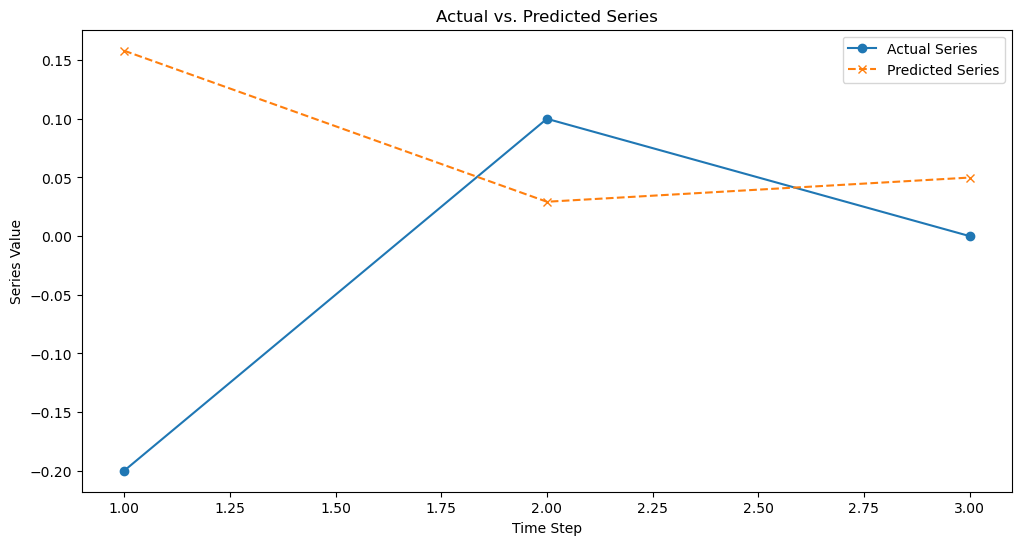

In [12]:
# Assuming the reservoir_states are already computed as per the previous code snippet

# Step 1: Prepare the target series for prediction (shift the input_series by one time step)
target_series = np.roll(input_series, -1)  # Shift input series to the left
target_series[-1] = 0  # Assume last value is zero or next unknown value for demonstration

# Step 2: Simulate a readout layer (for simplicity, we'll just manually set some weights)
# In practice, these weights would be learned using a method like linear regression
readout_weights = np.array([0.2, 0.5, 0.3])

# Step 3: Use the reservoir states to make predictions
# Skip the first state since it's the initial zero state and not used for prediction
predictions = np.dot(reservoir_states[1:], readout_weights)

# Step 4: Visualize the actual vs. predicted series
plt.figure(figsize=(12, 6))
plt.plot(time_steps[1:], target_series, label='Actual Series', marker='o')
plt.plot(time_steps[1:], predictions, label='Predicted Series', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Series')
plt.xlabel('Time Step')
plt.ylabel('Series Value')
plt.legend()
plt.grid(False)
plt.show()


The visualization of the reservoir states over time reveals several key aspects of how reservoir computing, particularly within the context of Echo State Networks (ESN), processes time-series data:

1. **Dynamic Response to Inputs**: Each neuron within the reservoir responds dynamically to the input sequence. The plot shows how the state of each neuron evolves over time in response to the inputs. This dynamic response is critical for capturing and encoding temporal patterns in the data.

2. **Diversity of Neuronal Activity**: The different trajectories of the neurons' states highlight the diversity in the reservoir's response. This diversity stems from the unique connections each neuron has with the input and other neurons within the reservoir. Such variability allows the reservoir to encode a broad range of information from the input sequence, enhancing its computational power.

3. **Memory Effect**: The reservoir exhibits a memory effect, where the state of the reservoir at any given time reflects not just the current input but also the influence of past inputs. This is evident in how the states of the neurons change over time, influenced by the sequence of inputs they receive. The memory capacity of the reservoir is crucial for tasks that require understanding the context or history in time-series data, such as prediction or classification.

4. **Nonlinearity**: The use of a nonlinear activation function (tanh in this case) allows the reservoir to capture nonlinear relationships within the data. This nonlinearity is a key feature that enables the reservoir to deal with complex patterns that linear systems might not handle effectively.

5. **High-Dimensional Representation**: Although we're only looking at a reservoir with three neurons, even in this small scale, we can see how a simple input sequence is transformed into a richer, high-dimensional representation. In larger reservoirs, this capability is amplified, allowing for the encoding of very complex temporal dynamics and relationships within the input data.

In summary, this simple example demonstrates the fundamental principles behind reservoir computing: diversity in response due to varied internal connections, memory of past inputs, nonlinearity, and the generation of a high-dimensional representation of the input sequence. These properties make reservoir computing systems powerful tools for processing time-series data, capable of performing tasks such as forecasting, pattern recognition, and system modeling with relatively low computational costs compared to training traditional recurrent neural networks.